In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df =  pd.read_csv('Uber+Drives+2016.csv')

In [3]:
df.head(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,1/6/2016 17:30,1/6/2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,1/7/2016 13:27,1/7/2016 13:33,Business,Cary,Cary,0.8,Meeting
8,1/10/2016 8:05,1/10/2016 8:25,Business,Cary,Morrisville,8.3,Meeting
9,1/10/2016 12:17,1/10/2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [4]:
df.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [5]:
df.drop(1155,inplace=True)

In [6]:
df.shape

(1155, 7)

In [7]:
df.size

8085

In [8]:
df.describe() ##because miles is only numbers and continous data here

,MILES*
count,1155.000000
mean,10.566840
std,21.579106
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


In [9]:
df.info() #starts from 0 and gives data count information and missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [10]:
df.isnull().value_counts()

START_DATE*  END_DATE*  CATEGORY*  START*  STOP*  MILES*  PURPOSE*
False        False      False      False   False  False   False       653
                                                          True        502
dtype: int64

In [11]:
df.isnull().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

The data description above says about null or nan values which can be encountered by 2 mentods 
1. Replacement with some data say median, or mode depending upon the usecase and purpose etc.
2. Deletion of those rows which have nan values incase we have sufficient data
3. Incase of unsufficient data when we have to give descriptive analysis then we choose to insert and fill with augmented data, rather than delete when we have less data around

In [12]:
df = df.dropna() #function to drop null value rows

In [13]:
df.shape

(653, 7)

In [14]:
df.describe()

,MILES*
count,653.000000
mean,11.196325
std,22.986429
min,0.500000
25%,3.200000
50%,6.400000
75%,10.400000
max,310.300000


Mean has changes;
So when we make such changes add data augment data or remove data all these values will change it will influence the data accordingly in various degrees so we have to look at the holistic picture thatbhow much it is going to influence the data then decide what we want to do.
For example removing the outliers to have a better dominant common average count.

In [15]:
print(df["START_DATE*"].unique)
print(df["START_DATE*"].nunique())


<bound method Series.unique of 0         1/1/2016 21:11
2         1/2/2016 20:25
3         1/5/2016 17:31
4         1/6/2016 14:42
5         1/6/2016 17:15
              ...       
1150     12/31/2016 1:07
1151    12/31/2016 13:24
1152    12/31/2016 15:03
1153    12/31/2016 21:32
1154    12/31/2016 22:08
Name: START_DATE*, Length: 653, dtype: object>
652


In [16]:
print(df["END_DATE*"].unique)
print(df["END_DATE*"].nunique())

<bound method Series.unique of 0         1/1/2016 21:17
2         1/2/2016 20:38
3         1/5/2016 17:45
4         1/6/2016 15:49
5         1/6/2016 17:19
              ...       
1150     12/31/2016 1:14
1151    12/31/2016 13:42
1152    12/31/2016 15:38
1153    12/31/2016 21:50
1154    12/31/2016 23:51
Name: END_DATE*, Length: 653, dtype: object>
652


UNIQUE STARTS AND STOPS

In [17]:
print(len(df["START*"].unique()))

131


Purpose of all this to figure out what all possible analysis of data and influence of analysis on the data i.e datadrame

In [18]:
print(len(df["STOP*"].unique()))

137


Unique start is 131 but unique stops are 137 what it tells?
Maybe common number of persons are starting from the same point and they are ending in different locations.

What the data suggests and what we find after analysis

### Lets explore the data parameter wise - 

1.Destination - (starting and stopping)

2.Time - (hour of the day, day of week, month of year)

3.Categories

4.Purpose 

5.Grouping two parameters to get more insights


In [19]:
# names of unique start points

print(df["START*"].unique())

['Fort Pierce' 'West Palm Beach' 'Cary' 'Jamaica' 'New York' 'Elmhurst'
 'Midtown' 'East Harlem' 'Flatiron District' 'Midtown East'
 'Hudson Square' 'Lower Manhattan' "Hell's Kitchen" 'Downtown' 'Gulfton'
 'Houston' 'Eagan Park' 'Morrisville' 'Durham' 'Farmington Woods'
 'Lake Wellingborough' 'Fayetteville Street' 'Raleigh' 'Whitebridge'
 'Hazelwood' 'Fairmont' 'Meredith Townes' 'Apex' 'Chapel Hill'
 'Northwoods' 'Edgehill Farms' 'Eastgate' 'East Elmhurst'
 'Long Island City' 'Katunayaka' 'Colombo' 'Nugegoda' 'Unknown Location'
 'Islamabad' 'R?walpindi' 'Noorpur Shahan' 'Preston' 'Heritage Pines'
 'Tanglewood' 'Waverly Place' 'Wayne Ridge' 'Westpark Place' 'East Austin'
 'The Drag' 'South Congress' 'Georgian Acres' 'North Austin'
 'West University' 'Austin' 'Katy' 'Sharpstown' 'Sugar Land' 'Galveston'
 'Port Bolivar' 'Washington Avenue' 'Briar Meadow' 'Latta' 'Jacksonville'
 'Lake Reams' 'Orlando' 'Kissimmee' 'Daytona Beach' 'Ridgeland' 'Florence'
 'Meredith' 'Holly Springs' 'Chessingt

These multiple locations describe that the data is from multiple places rather than a country because of places like brekeley and karanchi, rawalpindi, houston. Usage of uber all over the world 

In [20]:

print(df["STOP*"].unique())

['Fort Pierce' 'West Palm Beach' 'Palm Beach' 'Cary' 'Morrisville'
 'New York' 'Queens' 'East Harlem' 'NoMad' 'Midtown' 'Midtown East'
 'Hudson Square' 'Lower Manhattan' "Hell's Kitchen" 'Queens County'
 'Gulfton' 'Downtown' 'Houston' 'Jamestown Court' 'Durham' 'Whitebridge'
 'Raleigh' 'Umstead' 'Hazelwood' 'Westpark Place' 'Meredith Townes'
 'Leesville Hollow' 'Apex' 'Chapel Hill' 'Williamsburg Manor'
 'Macgregor Downs' 'Edgehill Farms' 'Walnut Terrace' 'Midtown West'
 'Long Island City' 'Jamaica' 'Unknown Location' 'Colombo' 'Nugegoda'
 'Katunayaka' 'Islamabad' 'R?walpindi' 'Noorpur Shahan' 'Heritage Pines'
 'Tanglewood' 'Waverly Place' 'Wayne Ridge' 'Northwoods'
 'Depot Historic District' 'West University' 'Congress Ave District'
 'Convention Center District' 'North Austin' 'The Drag' 'Coxville'
 'South Congress' 'Katy' 'Alief' 'Sharpstown' 'Sugar Land' 'Galveston'
 'Port Bolivar' 'Washington Avenue' 'Greater Greenspoint' 'Latta'
 'Jacksonville' 'Kissimmee' 'Lake Reams' 'Orlando' 'D

In [21]:
df["START*"].value_counts().head(10)
#lot of uber customer are from the cary.. 161

Cary                161
Unknown Location     55
Morrisville          54
Whitebridge          36
Durham               30
Kar?chi              26
Raleigh              21
Lahore               19
Islamabad            15
Apex                 11
Name: START*, dtype: int64

In [22]:
df["STOP*"].value_counts().head(10)

Cary                155
Morrisville          60
Unknown Location     56
Whitebridge          37
Durham               30
Kar?chi              26
Raleigh              21
Lahore               19
Islamabad            14
Apex                 11
Name: STOP*, dtype: int64

In [23]:
# To take it one level up in the ease of comparing between two series / lists , use sets 
# It has 
# Find details comparing (between) unique start and stop locations 
# Details about start and stop locations 

s_start  = set(df['START*']) #names of unique start points
s_stop =  set(df['STOP*']) #names of unique start points

print(len(s_start))
print(len(s_stop))

131
137


In [24]:
#Example on how to use sets to do intersection , union and difference

l1 = [1,2,3,4,4]
l2 = [3,4,5,6]

set(l2) - set(l1) # difference  ( whats in l2 and not in l1 )
set(l1) - set(l2) # difference ( whats in l1 and not in l2 )
set(l2) | set(l1) # union 
set(l2) & set(l1) # intersection 


{3, 4}

In [25]:
s_stop & s_start 

{'Apex',
 'Arabi',
 'Asheville',
 'Banner Elk',
 'Bellevue',
 'Berkeley',
 'Boone',
 'Burtrose',
 'Capitol One',
 'Cary',
 'Chalmette',
 'Chapel Hill',
 'Chessington',
 'Colombo',
 'Daytona Beach',
 'Downtown',
 'Durham',
 'East Harlem',
 'Edgehill Farms',
 'El Cerrito',
 'Emeryville',
 'Financial District',
 'Florence',
 'Fort Pierce',
 'Fuquay-Varina',
 'Galveston',
 'Gampaha',
 'Gulfton',
 'Hazelwood',
 "Hell's Kitchen",
 'Heritage Pines',
 'Holly Springs',
 'Houston',
 'Hudson Square',
 'Islamabad',
 'Jacksonville',
 'Jamaica',
 'Kar?chi',
 'Katunayaka',
 'Katy',
 'Kenner',
 'Kissimmee',
 'Lahore',
 'Lake Reams',
 'Latta',
 'Lexington Park at Amberly',
 'Long Island City',
 'Lower Garden District',
 'Lower Manhattan',
 'Mcvan',
 'Menlo Park',
 'Meredith Townes',
 'Metairie',
 'Midtown',
 'Midtown East',
 'Morrisville',
 'Mountain View',
 'New Orleans',
 'New York',
 'Newark',
 'Noorpur Shahan',
 'North Austin',
 'Northwoods',
 'Nugegoda',
 'Oakland',
 'Orlando',
 'Palo Alto',
 'Par

In [26]:
#Identify popular start points - top 10
df['START*'].value_counts().head(10)

Cary                161
Unknown Location     55
Morrisville          54
Whitebridge          36
Durham               30
Kar?chi              26
Raleigh              21
Lahore               19
Islamabad            15
Apex                 11
Name: START*, dtype: int64

In [27]:
#Identify popular stop destinations - top 10
df['STOP*'].value_counts().head(10)

Cary                155
Morrisville          60
Unknown Location     56
Whitebridge          37
Durham               30
Kar?chi              26
Raleigh              21
Lahore               19
Islamabad            14
Apex                 11
Name: STOP*, dtype: int64

In [28]:
# Are there cases where the start and the stop location are the same  ? 
df[df['START*'] == df['STOP*']]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
7,1/7/2016 13:27,1/7/2016 13:33,Business,Cary,Cary,0.8,Meeting
...,...,...,...,...,...,...,...
1147,12/30/2016 15:41,12/30/2016 16:03,Business,Kar?chi,Kar?chi,4.6,Errand/Supplies
1148,12/30/2016 16:45,12/30/2016 17:08,Business,Kar?chi,Kar?chi,4.6,Meeting
1149,12/30/2016 23:06,12/30/2016 23:10,Business,Kar?chi,Kar?chi,0.8,Customer Visit
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting


In [29]:
# Favorite starting point wrt the total miles covered 
df.groupby('START*')['MILES*'].sum().sort_values(ascending = False ).head(10)

START*
Cary                1443.8
Unknown Location     573.2
Jacksonville         375.2
Raleigh              322.2
Latta                310.3
Durham               301.0
Morrisville          287.0
Whitebridge          181.8
Boone                180.2
Florence             159.3
Name: MILES*, dtype: float64

In [30]:
df[df["START*"]=="Cary"]
#category is buisness ; hence we can conclude carry is one of the buisness centers

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
7,1/7/2016 13:27,1/7/2016 13:33,Business,Cary,Cary,0.8,Meeting
8,1/10/2016 8:05,1/10/2016 8:25,Business,Cary,Morrisville,8.3,Meeting
28,1/15/2016 11:43,1/15/2016 12:03,Business,Cary,Durham,10.4,Meal/Entertain
30,1/18/2016 14:55,1/18/2016 15:06,Business,Cary,Cary,4.8,Meal/Entertain
34,1/20/2016 10:36,1/20/2016 11:11,Business,Cary,Raleigh,17.1,Meeting
...,...,...,...,...,...,...,...
1046,12/12/2016 17:51,12/12/2016 18:01,Business,Cary,Morrisville,3.0,Meal/Entertain
1048,12/13/2016 18:19,12/13/2016 18:29,Business,Cary,Cary,4.2,Errand/Supplies
1049,12/13/2016 20:20,12/13/2016 20:29,Business,Cary,Cary,4.1,Meal/Entertain
1052,12/14/2016 17:50,12/14/2016 18:00,Business,Cary,Morrisville,3.0,Meal/Entertain


#### Find out most farthest start and stop pair - top10 ( aggregation ) ( BY TOTAL miles COVERED EVER ! )

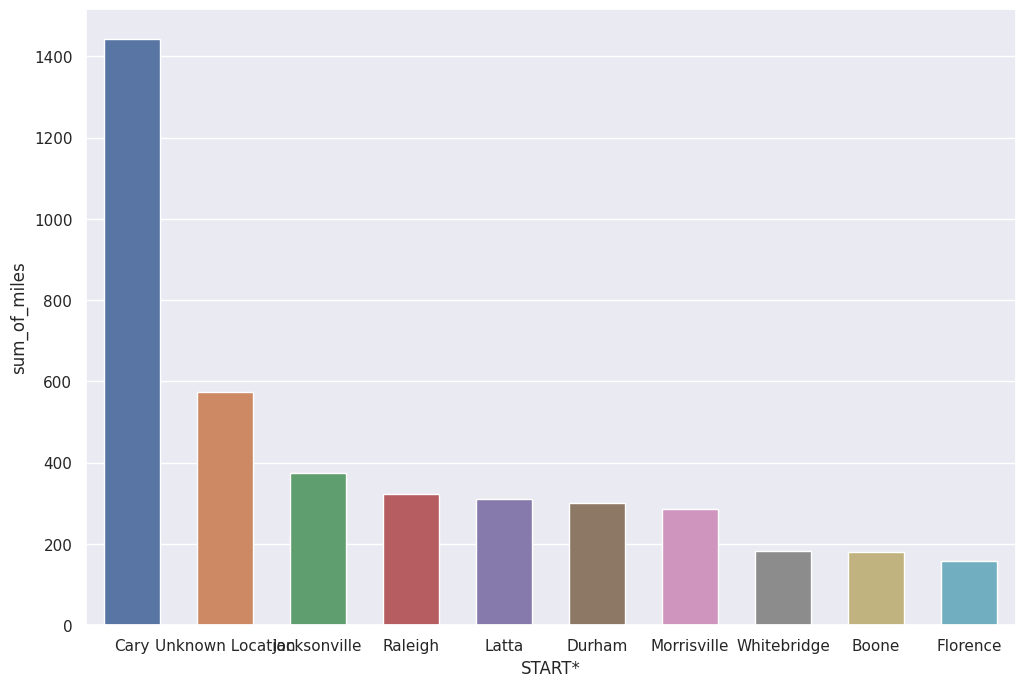

In [32]:
#Doing a quick plot 
k3 = df.groupby('START*')['MILES*'].sum().sort_values(ascending=False).head(10) 
k3= k3.reset_index() # flatten the dataframe 
k3.columns = ['START*' ,'sum_of_miles']
%matplotlib inline 
import seaborn as sns
sns.barplot(data= k3 , x= 'START*' , y ='sum_of_miles',width=0.6)
sns.set(rc={"figure.figsize":(12,8)})

In [33]:
df.groupby(['START*','STOP*'])['MILES*'].sum().sort_values(ascending=False).head()

START*            STOP*           
Unknown Location  Unknown Location    334.0
Cary              Durham              312.3
Latta             Jacksonville        310.3
Durham            Cary                298.4
Cary              Morrisville         293.7
Name: MILES*, dtype: float64

In [34]:
#Dropping Unknown Location Value  - Save into anothe dataframe ( you dont want to overwrite the original df)
df2 = df[df['START*']!= 'Unknown Location']
df2 = df2[df2['STOP*']!= 'Unknown Location']

df2.groupby(['START*','STOP*'])['MILES*'].sum().sort_values(ascending=False).head(10)

START*        STOP*       
Cary          Durham          312.3
Latta         Jacksonville    310.3
Durham        Cary            298.4
Cary          Morrisville     293.7
Raleigh       Cary            269.5
Morrisville   Cary            250.6
Cary          Cary            233.9
              Raleigh         230.4
Jacksonville  Kissimmee       201.0
Boone         Cary            180.2
Name: MILES*, dtype: float64

In [35]:
df2.groupby(['START*','STOP*'])['MILES*'].size().sort_values(ascending=False).head(10)

START*       STOP*      
Cary         Morrisville    52
Morrisville  Cary           51
Cary         Cary           44
             Durham         30
Durham       Cary           29
Kar?chi      Kar?chi        20
Cary         Raleigh        17
Lahore       Lahore         16
Raleigh      Cary           15
Cary         Apex           11
Name: MILES*, dtype: int64

**The most popular start to destination pair is Cary-Morrisville**

In [36]:
df.groupby(["START*","STOP*"])["MILES*"].value_counts()

START*         STOP*               MILES*
Apex           Cary                5.5       2
                                   5.7       2
                                   4.7       1
                                   5.3       1
                                   5.4       1
                                            ..
Whitebridge    Westpark Place      2.2       1
               Whitebridge         0.6       1
                                   4.2       1
               Williamsburg Manor  8.3       1
Winston Salem  Asheville           133.6     1
Name: MILES*, Length: 519, dtype: int64

In [37]:
df.groupby(["START*","STOP*"])["MILES*"].sum()

START*         STOP*             
Apex           Cary                   59.4
               Holly Springs           9.0
Arabi          Metairie               17.0
Asheville      Topton                 91.8
Austin         Katy                  136.0
                                     ...  
Whitebridge    Wayne Ridge            31.9
               Westpark Place          6.2
               Whitebridge             4.8
               Williamsburg Manor      8.3
Winston Salem  Asheville             133.6
Name: MILES*, Length: 239, dtype: float64

In [38]:
df.groupby(["START*","STOP*"])["MILES*"].sum().sort_values(ascending=False)

START*               STOP*                  
Unknown Location     Unknown Location           334.0
Cary                 Durham                     312.3
Latta                Jacksonville               310.3
Durham               Cary                       298.4
Cary                 Morrisville                293.7
                                                ...  
Tribeca              Financial District           0.9
Fayetteville Street  Depot Historic District      0.8
Medical Centre       Tudor City                   0.7
Soho                 Tribeca                      0.5
Katunayaka           Katunayaka                   0.5
Name: MILES*, Length: 239, dtype: float64

In [39]:
(df.groupby(["START*","STOP*"])["PURPOSE*"]).value_counts(ascending=False).head(10)
#Grouping start and stop WRT purpose for further insight for purposes

START*      STOP*          PURPOSE*       
Apex        Cary           Customer Visit     5
                           Meal/Entertain     3
                           Meeting            1
                           Temporary Site     1
            Holly Springs  Meeting            1
Arabi       Metairie       Meal/Entertain     1
Asheville   Topton         Meeting            1
Austin      Katy           Customer Visit     1
Banner Elk  Banner Elk     Errand/Supplies    1
            Boone          Charity ($)        1
Name: PURPOSE*, dtype: int64

The most popular start and stop pair - ( BY COUNT of travels! )

In [40]:
df2.groupby(['START*','STOP*'])['MILES*'].size().sort_values(ascending=False).head(10)

START*       STOP*      
Cary         Morrisville    52
Morrisville  Cary           51
Cary         Cary           44
             Durham         30
Durham       Cary           29
Kar?chi      Kar?chi        20
Cary         Raleigh        17
Lahore       Lahore         16
Raleigh      Cary           15
Cary         Apex           11
Name: MILES*, dtype: int64

CALCULATE the journey time. COnvert the time stamps to integers and then calculate.
To have an understanding of trip time.

In [ ]:
df['START_DATE*'] = df['START_DATE*'].apply(lambda x:pd.to_datetime(x))

In [ ]:
df['START_DATE*']

In [ ]:
df['END_DATE*'] = df['END_DATE*'].apply(lambda x:pd.to_datetime(x))

In [ ]:
df['END_DATE*']

In [ ]:
df['TRIP_TIME*'] = (df['END_DATE*']-df['START_DATE*'])

In [ ]:
df.info()

In [ ]:
df['START*'].nunique()

In [ ]:
len(set(df['START*']))

In [ ]:
df.groupby(['START*','STOP*','CATEGORY*'])['MILES*'].sum().sort_values(ascending=False).head(20)

In [ ]:
df.groupby(['START*','STOP*','CATEGORY*','PURPOSE*'])['MILES*'].sum().sort_values(ascending=False).head(20)

In [ ]:
##FREECODE CHAMP
df[['START*','CATEGORY*']].value_counts()

In [ ]:
df[['START*','CATEGORY*']]

## 2. Manipulating date & time objects

In [ ]:
df.head()

In [ ]:
df["TRIP_TIME*"]

We will be using the datetime module (  https://docs.python.org/3/library/datetime.html  )

Search for "strftime() and strptime() Format Codes" in the documentation page

In [41]:
df.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [42]:
df["START_DATE*"]=df["START_DATE*"].apply(lambda x: str(x))

In [43]:
df["END_DATE*"] = df["END_DATE*"].apply(lambda x: str(x))

In [44]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [45]:
# Create columns by converting the start and end date into a datatime format
# You can also over write the same column - but for the sake of understanding the difference in formats , we create new columns
from datetime import datetime
df['start_dt'] = df['START_DATE*'].apply(lambda x : datetime.strptime(x, '%m/%d/%Y %H:%M'))
df['end_dt'] = df['END_DATE*'].apply(lambda x : datetime.strptime(x, '%m/%d/%Y %H:%M'))

In [46]:
df.head()
df.dtypes  # See how the dtype is different ?

START_DATE*            object
END_DATE*              object
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
start_dt       datetime64[ns]
end_dt         datetime64[ns]
dtype: object

In [47]:
#Create more columns by using the inbuilt functionalities of datatime module

df['start_day'] = df['start_dt'].dt.day
df['start_hour'] = df['start_dt'].dt.hour
df['start_month'] = df['start_dt'].dt.month
df['d_of_wk'] = df['start_dt'].dt.dayofweek   # Days encoded as 0-6  ( monday =0, Tue =1 .... )


In [48]:
# You can convert the numeric encoding of weekdays into short form by manually writing the mapping 
# days = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
# df['day_of_week'] = df['day_of_week'].apply(lambda x: days[x])

#or use the builtin functions 

df['weekday'] = df['start_dt'].apply(lambda x : datetime.strftime(x,'%a'))  # ( or directly convert into the short form)

In [49]:
# Similarly you can use the calendar library to get the month abbreviation 

#import calendar
#df['start_month_cal'] = df['start_month'].apply(lambda x: calendar.month_abbr[x])

# or 
# use the built in functions in datatime module
df['cal_month'] =  df['start_dt'].apply(lambda x : datetime.strftime(x,'%b'))

In [50]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,start_dt,end_dt,start_day,start_hour,start_month,d_of_wk,weekday,cal_month
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01 21:11:00,2016-01-01 21:17:00,1,21,1,4,Fri,Jan
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02 20:25:00,2016-01-02 20:38:00,2,20,1,5,Sat,Jan
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05 17:31:00,2016-01-05 17:45:00,5,17,1,1,Tue,Jan
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06 14:42:00,2016-01-06 15:49:00,6,14,1,2,Wed,Jan
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016-01-06 17:15:00,2016-01-06 17:19:00,6,17,1,2,Wed,Jan


In [51]:
# Which month did he get most drives  ? 
df.groupby(['start_month']).size() #['start_day']

start_month
1      59
2      82
3      71
4      50
5      46
6      73
7      46
8      12
10     20
11     60
12    134
dtype: int64

In [53]:
df.groupby('cal_month').sum()['MILES*'].sort_values(ascending = False)

/tmp/ipykernel_4680/215306813.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('cal_month').sum()['MILES*'].sort_values(ascending = False)


cal_month
Mar    1455.9
Apr    1094.9
Dec     924.4
Feb     727.2
Nov     635.4
Jun     541.0
Jan     500.7
Oct     496.8
Jul     488.3
May     358.5
Aug      88.1
Name: MILES*, dtype: float64

In [54]:
# Getting the average distance covered each month
df.groupby('cal_month').mean()['MILES*'].sort_values(ascending = False)

/tmp/ipykernel_4680/1343824744.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('cal_month').mean()['MILES*'].sort_values(ascending = False)


cal_month
Oct    24.840000
Apr    21.898000
Mar    20.505634
Jul    10.615217
Nov    10.590000
Feb     8.868293
Jan     8.486441
May     7.793478
Jun     7.410959
Aug     7.341667
Dec     6.898507
Name: MILES*, dtype: float64

In [ ]:
# Write your inferences here based on the last 3 outputs 

In [55]:
#Which day did he get most drives  ? 
df.groupby(['weekday']).size()  

weekday
Fri    125
Mon     87
Sat     83
Sun     87
Thu     92
Tue     94
Wed     85
dtype: int64

**When does he usually start the trip ?**

In [56]:
df.groupby('start_hour').size()

start_hour
0     13
1      4
2      1
3      3
5      3
6      2
7      8
8     17
9     26
10    33
11    39
12    43
13    55
14    52
15    51
16    45
17    51
18    51
19    35
20    45
21    34
22    21
23    21
dtype: int64

This looks like an interesting data 

Does he have a prefered time of start ?

In [57]:
df['stop_hour'] = df['end_dt'].dt.hour

<AxesSubplot: xlabel='start_hour', ylabel='count'>

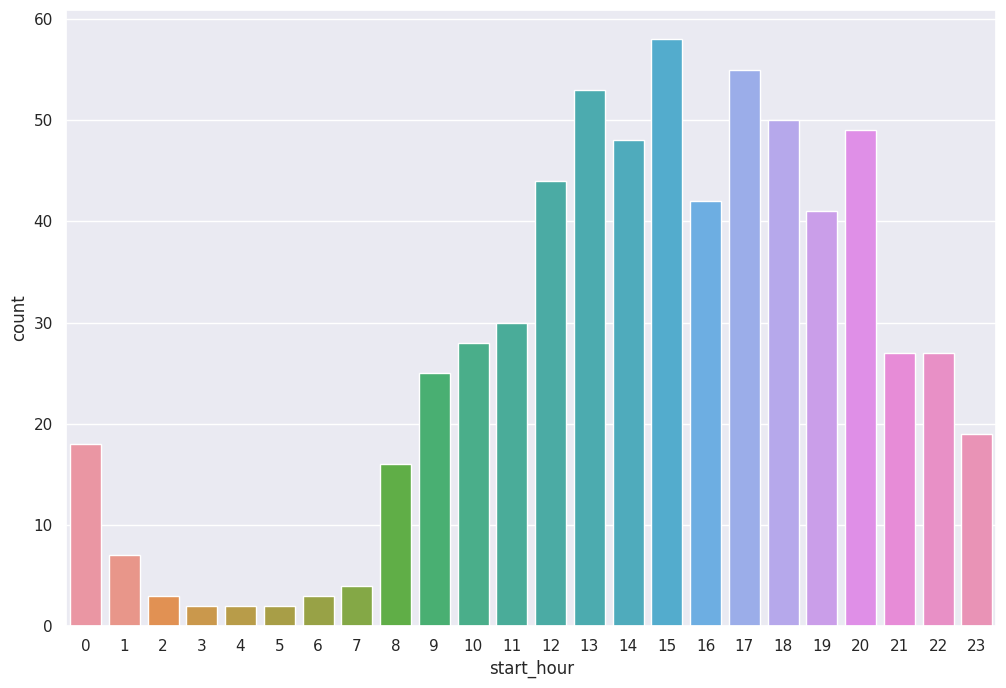

In [58]:
df_hrs = df.groupby('stop_hour').size()
df_hrs = df_hrs.reset_index()
df_hrs.columns = ['start_hour' ,'count']
sns.barplot(data= df_hrs , x ='start_hour' , y = 'count')

Looks like he mostly starts the trip around 9-10 and the peak hours seem to be between 12- 5 PM 

### Duration of the trips 

In [59]:
df['diff'] = (df['end_dt'] - df['start_dt'])

In [60]:
df.dtypes

START_DATE*             object
END_DATE*               object
CATEGORY*               object
START*                  object
STOP*                   object
MILES*                 float64
PURPOSE*                object
start_dt        datetime64[ns]
end_dt          datetime64[ns]
start_day                int64
start_hour               int64
start_month              int64
d_of_wk                  int64
weekday                 object
cal_month               object
stop_hour                int64
diff           timedelta64[ns]
dtype: object

This creates a timedelta datatype

### How long did the trips last 

In [61]:
df['diff_hr'] = df['diff'].astype('timedelta64[h]')

Find the date time units in  https://docs.scipy.org/doc/numpy/reference/arrays.datetime.html

search for 'Datetime Units'

In [62]:
df['diff'].describe()

count                          653
mean     0 days 00:23:23.889739663
std      0 days 00:25:46.178407818
min                0 days 00:02:00
25%                0 days 00:11:00
50%                0 days 00:18:00
75%                0 days 00:28:00
max                0 days 05:30:00
Name: diff, dtype: object

In [63]:
# View in terms of minutes 
df['diff_mins'] = df['diff'].astype('timedelta64[m]')

In [64]:
df['diff_mins'].describe()

count    653.000000
mean      23.398162
std       25.769640
min        2.000000
25%       11.000000
50%       18.000000
75%       28.000000
max      330.000000
Name: diff_mins, dtype: float64

There seems to be somethin strange with the minumum time ( in minutes ) - it is 0 

In [66]:
len(df[df['START_DATE*'] == df['END_DATE*']])

df[df['START_DATE*'] == df['END_DATE*']]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,start_dt,end_dt,start_day,start_hour,start_month,d_of_wk,weekday,cal_month,stop_hour,diff,diff_hr,diff_mins


There are some values where the start and end dates are the same - remove them ?

In [67]:
len(df2)

572

### Speed 

In [69]:
# calculate trip speed for each trip
df['Duration_hours'] = df['diff_mins'] / 60
df['Speed'] = df['MILES*'] / df['Duration_hours']
df['Speed'].describe()

count    653.000000
mean      25.261340
std       16.815108
min        6.000000
25%       16.571429
50%       22.285714
75%       29.100000
max      228.000000
Name: Speed, dtype: float64

Remove the ones with unknown location

In [74]:
# df2 = df[df.START != 'Unknown Location']
# df2 = df2[df2.STOP != 'Unknown Location']

#or 
#you can filter using one single conditional statement
df2 = df[(df["START*"] != 'Unknown Location') & ( df['STOP*'] != 'Unknown Location')]

In [75]:
# Remove the ones that have the same start and end time  ( and redo the analysis )
df2 = df[df.start_dt != df.end_dt]


# we still see some really fast driving !! 
df2.sort_values(by ='diff_mins', ascending = True).head(5)

# To do 
# Take a cut off for the time taken to drive to  do the speed analysis again 
# something like ( df.diff_mins > 5 ) # analyse only the trips that lasted atleast 5 mins 

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,start_dt,end_dt,start_day,...,start_month,d_of_wk,weekday,cal_month,stop_hour,diff,diff_hr,diff_mins,Duration_hours,Speed
44,1/26/2016 17:27,1/26/2016 17:29,Business,Cary,Cary,0.5,Errand/Supplies,2016-01-26 17:27:00,2016-01-26 17:29:00,26,...,1,1,Tue,Jan,17,0 days 00:02:00,0.0,2.0,0.033333,15.0
1106,12/24/2016 12:51,12/24/2016 12:53,Business,Lahore,Lahore,1.6,Errand/Supplies,2016-12-24 12:51:00,2016-12-24 12:53:00,24,...,12,5,Sat,Dec,12,0 days 00:02:00,0.0,2.0,0.033333,48.0
375,5/18/2016 13:00,5/18/2016 13:02,Business,Morrisville,Raleigh,7.6,Customer Visit,2016-05-18 13:00:00,2016-05-18 13:02:00,18,...,5,2,Wed,May,13,0 days 00:02:00,0.0,2.0,0.033333,228.0
420,6/8/2016 17:16,6/8/2016 17:18,Business,Soho,Tribeca,0.5,Errand/Supplies,2016-06-08 17:16:00,2016-06-08 17:18:00,8,...,6,2,Wed,Jun,17,0 days 00:02:00,0.0,2.0,0.033333,15.0
317,4/15/2016 12:29,4/15/2016 12:32,Business,Meredith Townes,Harden Place,1.4,Errand/Supplies,2016-04-15 12:29:00,2016-04-15 12:32:00,15,...,4,4,Fri,Apr,12,0 days 00:03:00,0.0,3.0,0.050000,28.0


## 3. Category & Purpose

In [77]:
df['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

**Most trips are in the business category**

In [78]:
#Purpose
df['PURPOSE*'].value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE*, dtype: int64

**Most trips are for meetings**

In [79]:
#Average distance traveled for each activity
df.groupby('PURPOSE*').mean()['MILES*'].sort_values(ascending = False)

/tmp/ipykernel_4680/1699163191.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('PURPOSE*').mean()['MILES*'].sort_values(ascending = False)


PURPOSE*
Commute            180.200000
Customer Visit      20.688119
Meeting             15.247594
Charity ($)         15.100000
Between Offices     10.944444
Temporary Site      10.474000
Meal/Entertain       5.698125
Airport/Travel       5.500000
Moving               4.550000
Errand/Supplies      3.968750
Name: MILES*, dtype: float64

Now lets try to answer some questions from this data.

Question1: How many miles was earned per category and purpose ?

Question2: What is percentage of business miles vs personal?

Question3: How much time was spend for drives per category and purpose? 


In [80]:
#Question1: How many miles was earned per category and purpose ?
df.groupby('PURPOSE*').sum()['MILES*'].sort_values(ascending = False)

/tmp/ipykernel_4680/2327051725.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('PURPOSE*').sum()['MILES*'].sort_values(ascending = False)


PURPOSE*
Meeting            2851.3
Customer Visit     2089.5
Meal/Entertain      911.7
Temporary Site      523.7
Errand/Supplies     508.0
Between Offices     197.0
Commute             180.2
Moving               18.2
Airport/Travel       16.5
Charity ($)          15.1
Name: MILES*, dtype: float64

In [81]:
#Question1: How many miles was earned per category and purpose ?
df.groupby('CATEGORY*').sum()['MILES*'].sort_values(ascending = False)

/tmp/ipykernel_4680/1967156995.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('CATEGORY*').sum()['MILES*'].sort_values(ascending = False)


CATEGORY*
Business    7097.7
Personal     213.5
Name: MILES*, dtype: float64

In [82]:
#Question2: What is percentage of business miles vs personal?
df1 = df.groupby('CATEGORY*').agg({'MILES*':'sum'})
df1
df1.apply(lambda x: x/x.sum()*100).rename(columns = {'MILES':'% of Miles'})

,MILES*
CATEGORY*,
Business,97.079823
Personal,2.920177


In [83]:
#Question3: How much time was spend for drives per category and purpose?
dfk= df.groupby('CATEGORY*').sum()['diff_mins'].sort_values(ascending = False)
dfk.apply(lambda x: x/60)

/tmp/ipykernel_4680/2751272997.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfk= df.groupby('CATEGORY*').sum()['diff_mins'].sort_values(ascending = False)


CATEGORY*
Business    250.116667
Personal      4.533333
Name: diff_mins, dtype: float64

In [84]:
#Question3: How much time was spend for drives per category and purpose? 
df.groupby('PURPOSE*').sum()['diff_mins'].sort_values(ascending = False)

/tmp/ipykernel_4680/2152839988.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('PURPOSE*').sum()['diff_mins'].sort_values(ascending = False)


PURPOSE*
Meeting            5561.0
Customer Visit     3375.0
Meal/Entertain     2580.0
Errand/Supplies    1661.0
Temporary Site     1293.0
Between Offices     459.0
Commute             185.0
Airport/Travel       78.0
Moving               60.0
Charity ($)          27.0
Name: diff_mins, dtype: float64